In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Task 1

In [3]:
data = pd.read_csv('data/task2.txt', sep='\t', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.155051,0.974187,0.074675,0.442146,0.369443,0.468138,0.578846,0.422744,0.931543,0.474148,15
1,0.968379,0.716820,0.678846,0.510049,0.545299,0.573692,0.817491,0.206636,0.880111,0.574187,17
2,0.468263,0.405603,0.320325,0.468084,0.100995,0.974407,0.300062,0.608356,0.050082,0.762011,12
3,0.776820,0.103740,0.373748,0.797782,0.906810,0.599069,0.626680,0.924705,0.632768,0.512663,16
4,0.407886,0.415357,0.101543,0.935160,0.444124,0.193607,0.656837,0.599929,0.868582,0.405406,20


Проверим наличие пропусков в данных и узнаем размер датасета. Также посмотрим на распределение значений признаков в данный (мин, макс, среднее)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1000 non-null   float64
 1   1       1000 non-null   float64
 2   2       1000 non-null   float64
 3   3       1000 non-null   float64
 4   4       1000 non-null   float64
 5   5       1000 non-null   float64
 6   6       1000 non-null   float64
 7   7       1000 non-null   float64
 8   8       1000 non-null   float64
 9   9       1000 non-null   float64
 10  10      1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [15]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.490491,0.499785,0.496466,0.503167,0.508902,0.513466,0.487111,0.498870,0.505611,0.499113,15.014000
std,0.293920,0.278833,0.298024,0.284102,0.283300,0.291059,0.288407,0.285954,0.283131,0.284073,4.771223
min,0.000188,0.000085,0.003110,0.001223,0.005314,0.000517,0.000493,0.000408,0.007883,0.000170,3.000000
25%,0.218825,0.262168,0.231492,0.268925,0.274572,0.255524,0.237778,0.256103,0.262332,0.249675,12.000000
50%,0.504439,0.500901,0.484347,0.503412,0.508629,0.527155,0.475274,0.501300,0.518847,0.509422,15.000000
75%,0.738004,0.734516,0.764729,0.747587,0.742461,0.766870,0.738885,0.736849,0.748473,0.741870,18.000000
max,0.999566,0.999959,0.998918,0.998785,0.998478,0.999059,0.999179,0.998646,0.998884,0.998819,29.000000


Расчитанные статистики достаточно похожи по всем признакам, скорее всего среди признаком есть зависимые. Это может привести к проблеме мультиколлинеарности и ухудшить нашу модель. Так как нету информации о типе признака, то трудно сказать можно ли какие-то признаки группировать. Интуитивно кажется, что 0-2, 3-5 и 8, 6-7 и 9 группируются и зависимы. Построим попарный график для датасета, возможно удастсься увидеть какие-то попарные закономерности.

In [7]:
from seaborn import pairplot, heatmap, diverging_palette

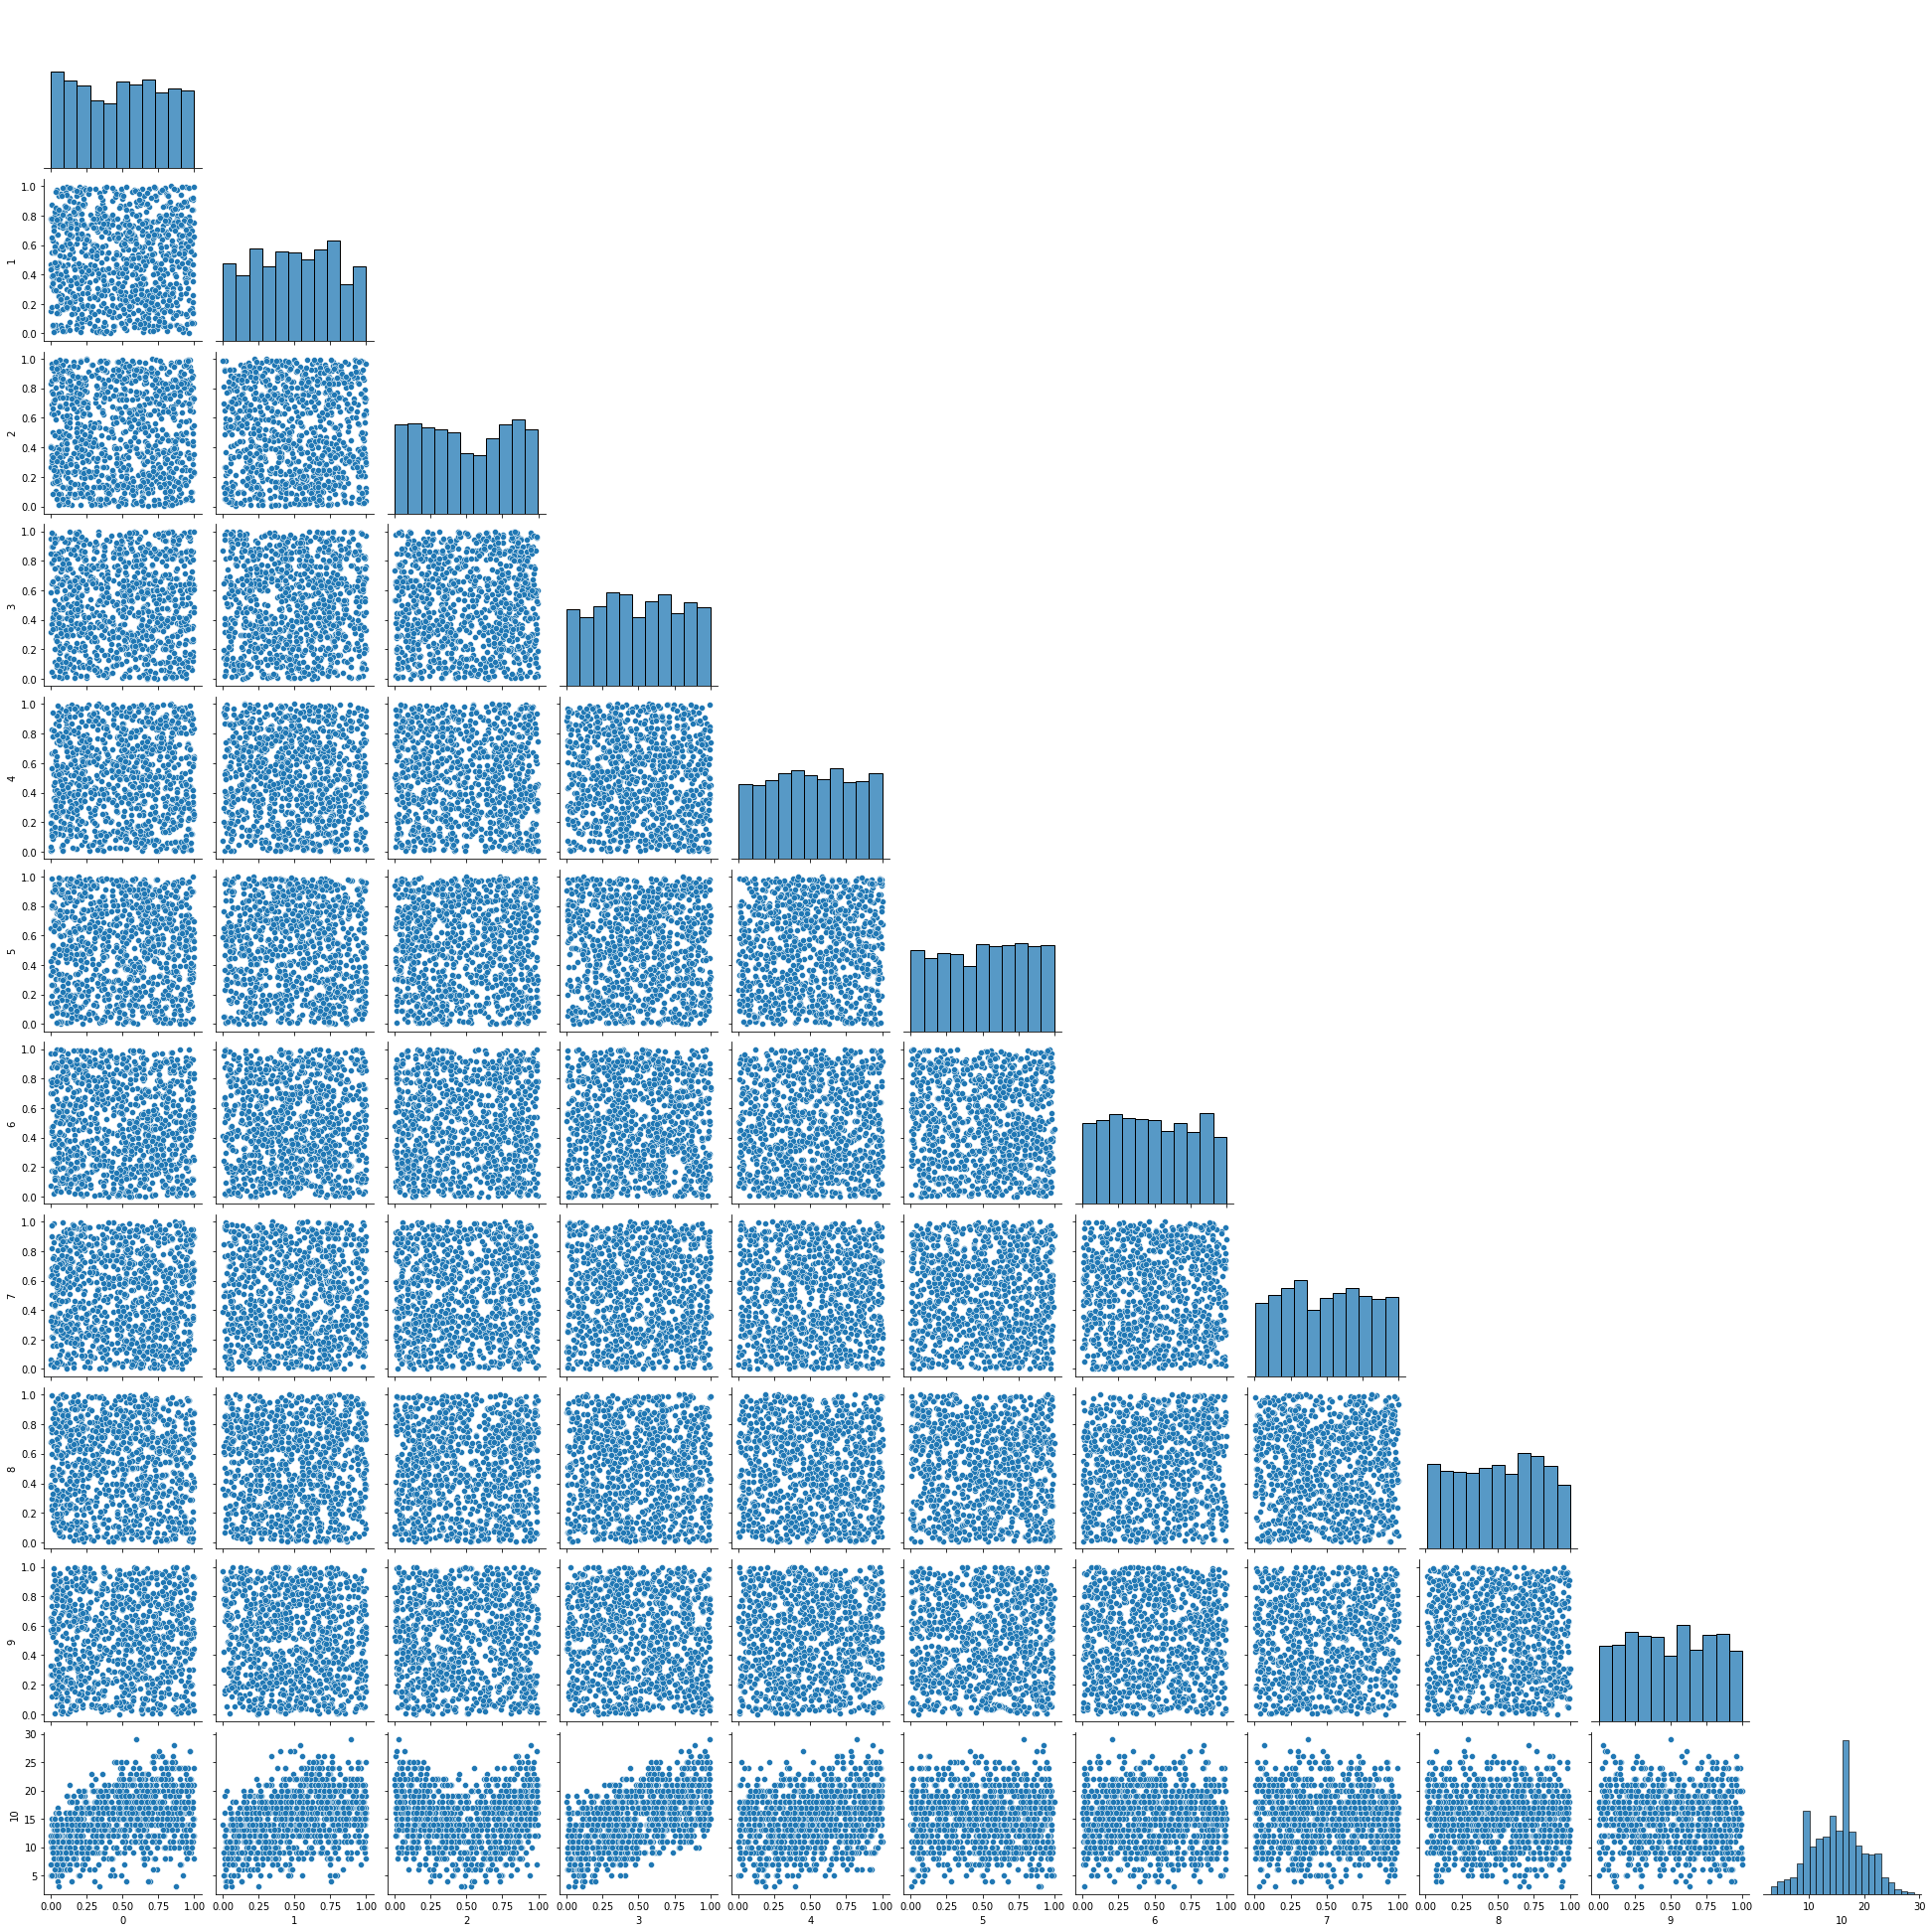

In [13]:
pairplot(data, corner=True)

Самым интересным тут выглядит последняя строка, в которой можно увидеть как наш target зависить в отдельности от каждого из признаков. Признаки 0 и 1 похожи и скорее всего имеют нелинейную зависимость для таргета (похоже на кусочек параболы), признак 2 явно парабола, признак 3 - линейная зависимость. Остальные признаки скорее константную зависимость. Так как по иллюстрациям явно видно нелинейную зависимость, то для расчета коэффициента корреляций будем использовать формулу Кендалла (она лучше подходит для учета квадратичной зависимости, чем формула Пирсона).

[Text(0.5, 0, '0'),
 Text(1.5, 0, '1'),
 Text(2.5, 0, '2'),
 Text(3.5, 0, '3'),
 Text(4.5, 0, '4'),
 Text(5.5, 0, '5'),
 Text(6.5, 0, '6'),
 Text(7.5, 0, '7'),
 Text(8.5, 0, '8'),
 Text(9.5, 0, '9'),
 Text(10.5, 0, '10')]

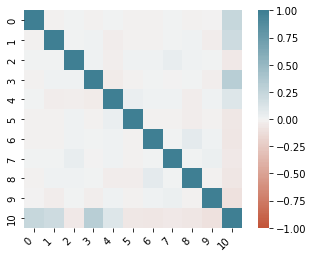

In [14]:
corr = data.corr(method='kendall')
ax = heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Судя по графику, признаки 0, 1, 3 и 4 сильнее влияют на таргет, а попарная корреляция между признаками не сильно велика, чтобы судить о какой-то зависимости между признаками. Попробуем подход в лоб и построим линейную регрессию от всех признаков. Это будет нашим BaseLine. Метрику посчитаем с помощью кросс-валидации с помощью $R^2$. 

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold

In [4]:
X, y = data.loc[:, 0:9], data.loc[:, 10]

In [9]:
model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=241)

score = cross_val_score(model, X, y, cv=cv, scoring="r2", n_jobs=-1).mean()
print(f"Score: {score:.3f}")

Score: 0.729


Проверим, правда ли, что если осавить признаки 0, 1, 3 и 4 то качество модели улучшится.

In [15]:
features = [0, 1, 3, 4]
X, y = data.loc[:, features], data.loc[:, 10]

In [18]:
model = LinearRegression()
cv = KFold(n_splits=5, shuffle=True, random_state=241)

score = cross_val_score(model, X, y, cv=cv, scoring="r2", n_jobs=-1).mean()
print(f"Score: {score:.3f}")

Score: 0.732


Действительно, качество модели улучшилось, хотя и не так сильно как хотелось бы. Так как на графика была видна явная нелинейная зависимость между прихнаками и таргетом, возьмем модель, например случайный лес, чтобы попытаться восстановить нелинейность.

In [19]:
from sklearn.ensemble import RandomForestRegressor
X, y = data.loc[:, 0:9], data.loc[:, 10]

In [20]:
model = RandomForestRegressor()
cv = KFold(n_splits=5, shuffle=True, random_state=241)

score = cross_val_score(model, X, y, cv=cv, scoring="r2", n_jobs=-1).mean()
print(f"Score: {score:.3f}")

Score: 0.862


In [22]:
model.fit(X, y)

RandomForestRegressor()

Text(0.5, 0, 'Random Forest Feature Importance')

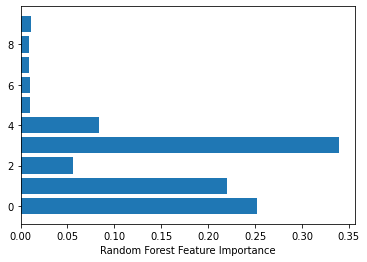

In [30]:
plt.barh(X.keys(), model.feature_importances_)
plt.xlabel("Random Forest Feature Importance")

# Task 2

In [70]:
data = pd.read_json('data/test_task_NLP.json', orient='values')
data.head()

,0,1,2,3,4,5,6
0,Баклажаны с орехами упак,Баклажаны с творожной начинкой от бренд-шефа АВ,None,None,None,None,None
1,Блинчики с курицей упак (4 шт),"Блинчики с мясом, Уже Готово , 140 г",None,None,None,None,None
2,Блинчики с мясом упак (4 шт),"Блинчики с мясом, Уже Готово , 220 г, Россия",None,None,None,None,None
3,Блины без начинки упак,"Блины Русские от бренд-шефа АВ, Россия",None,None,None,None,None
4,Винегрет упак,Салат FreshSecret Винегрет 600г,"Винегрет с ароматным подсолнечным маслом, Уже ...",None,None,None,None


Как можно трактовать данные и задачу:
1) Данные были размеченные вручную (блины с блинами, винегрет с винигретом) и описывают, например, набор фирменых товаров магазинов Азбуки Вкуса (бренд-шеф АВ). И задача группировки товаров может иметь смысл, например, для понимания их взаимозаменяемости, для рекомендаций в онлайн магазине, для группового расположения на ветрине.

2) Данные описывают запасы разных магазинов сети (количество колонок = количеству магазинов) и мы хотим сравнивать как похожие товары продаются в разных магазинах, чтобы оптимизировать поставки или хотим сгруппировать данные по кластерам, чтобы при покупке онлайн покупатель видел походие продукты в одном разделе.

Наверняка можно придумать еще с десяток примеров как использовать жти данные, но я остановлюсь на этих двух и буду решать задачу для второй интерпретации.

Самое простое как можно сравнивать две строки - это редакторское расстояние Левенштейна, которое заключается в измерении количества операций по изменению одной из строк для того, чтобы превратить ее в другую за счет операций удаления, замены и подстановка.

In [79]:
dataset = data.fillna('')
dataset = (dataset[0] + ' ' +  dataset[1] + ' ' + dataset[2] + ' ' + dataset[3] 
+ ' ' + dataset[3] + ' ' + dataset[4] + ' ' + dataset[5] + ' ' + dataset[6])

dataset.head()

0    Баклажаны с орехами упак Баклажаны с творожной...
1    Блинчики с курицей упак (4 шт) Блинчики с мясо...
2    Блинчики с мясом упак (4 шт) Блинчики с мясом,...
3    Блины без начинки упак Блины Русские от бренд-...
4    Винегрет упак Салат FreshSecret Винегрет 600г ...
dtype: object

In [80]:
from fuzzywuzzy import fuzz

d:\work\accenture\.venv\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


Попробуем решить в лоб, посомтрим на матрицу расстояний Левенштейна и попытаемся кластеризовать данные по этой матрице, не будем обрабатывать строки и удалять числа, единицы измерения и приводить к одному регистру. Функция token_sort_ratio сравнивает слова не зависимо от регистра или порядка.

In [89]:
dist = np.zeros((dataset.size, dataset.size))

for i in range(dataset.size):
    for j in range(i, dataset.size):
        dist[i, j] = fuzz.token_sort_ratio(dataset.iloc[i], dataset.iloc[j])

In [90]:
dist

array([[100.,  42.,  39., ...,  26.,  26.,  23.],
       [  0., 100.,  82., ...,  30.,  33.,  27.],
       [  0.,   0., 100., ...,  39.,  36.,  38.],
       ...,
       [  0.,   0.,   0., ..., 100.,  92.,  59.],
       [  0.,   0.,   0., ...,   0., 100.,  61.],
       [  0.,   0.,   0., ...,   0.,   0., 100.]])

In [91]:
from scipy.cluster.hierarchy import ward, dendrogram

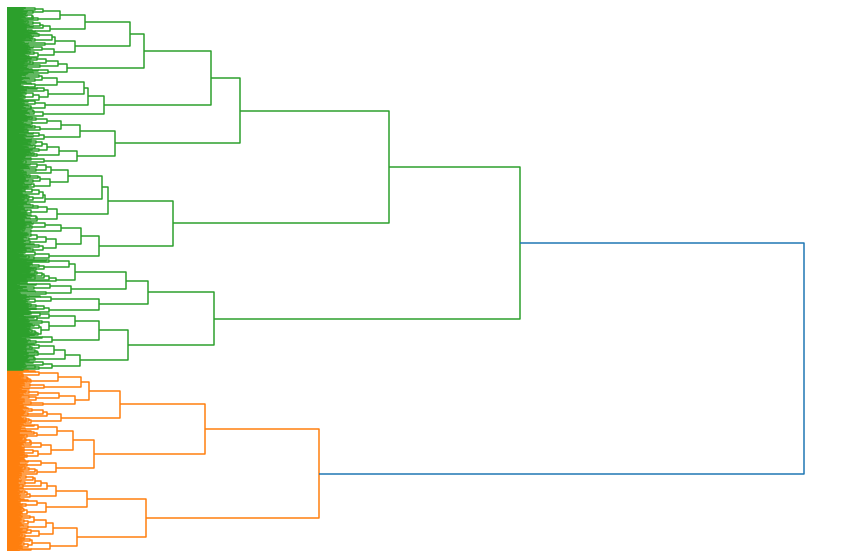

In [92]:
con_mat = ward(dist) #матрица связи для кластеринга

fig, ax = plt.subplots(figsize=(15, 10)) # set size
ax = dendrogram(con_mat, orientation='right')

plt.axis('off')
plt.show()